<a href="https://colab.research.google.com/github/shruti24101729/Data-Analysis-and-Visualization/blob/main/dataWrangling3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### mixed data handling:

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df=df[['Cabin','Ticket','Survived']]
df.head()

,Cabin,Ticket,Survived
0,NaN,A/5 21171,0
1,C85,PC 17599,1
2,NaN,STON/O2. 3101282,1
3,C123,113803,1
4,NaN,373450,0


In [ ]:
df.shape

(891, 3)

In [ ]:
df['cabin_cat']=df['Cabin'].str[0]# captures the first letter
df['cabin_num']=df['Cabin'].str.extract('(\d+)')# captures numerical part
#df['cabin_num']=df['cabin_num'].astype('float')

df.head()

,Cabin,Ticket,Survived,cabin_cat,cabin_num
0,NaN,A/5 21171,0,NaN,NaN
1,C85,PC 17599,1,C,85
2,NaN,STON/O2. 3101282,1,NaN,NaN
3,C123,113803,1,C,123
4,NaN,373450,0,NaN,NaN


In [ ]:
#for ticket column
df['ticket_num']=df['Ticket'].apply(lambda s: s.split()[-1])
df['ticket_num']=pd.to_numeric(df['ticket_num'],errors='coerce',downcast='integer')

df['ticket_cat']=df['Ticket'].apply(lambda s: s.split()[0])
df['ticket_cat']=np.where(df['ticket_cat'].str.isdigit(),np.nan,df['ticket_cat'])

df.head(7)

,Cabin,Ticket,Survived,cabin_cat,cabin_num,ticket_num,ticket_cat
0,NaN,A/5 21171,0,NaN,NaN,21171.0,A/5
1,C85,PC 17599,1,C,85,17599.0,PC
2,NaN,STON/O2. 3101282,1,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,1,C,123,113803.0,NaN
4,NaN,373450,0,NaN,NaN,373450.0,NaN
5,NaN,330877,0,NaN,NaN,330877.0,NaN
6,E46,17463,0,E,46,17463.0,NaN


In [ ]:
###handling date and time variables:
date=pd.read_csv('orders.csv')
time=pd.read_csv('messages.csv')

In [ ]:
date.head()

,date,product_id,city_id,orders
0,2019-12-10,5628,25,3
1,2018-08-15,3646,14,157
2,2018-10-23,1859,25,1
3,2019-08-17,7292,25,1
4,2019-01-06,4344,25,3


In [ ]:
time.head()

,date,msg
0,2013-12-15 00:50:00,ищу на сегодня мужика 37
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше


In [ ]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        1000 non-null   object
 1   product_id  1000 non-null   int64 
 2   city_id     1000 non-null   int64 
 3   orders      1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [ ]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1000 non-null   object
 1   msg     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [ ]:
date['date']=pd.to_datetime(date['date'])
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1000 non-null   datetime64[ns]
 1   product_id  1000 non-null   int64         
 2   city_id     1000 non-null   int64         
 3   orders      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 31.4 KB


In [ ]:
date=date.drop(columns=['product_id','city_id','orders'])

In [ ]:
date['date_year']=date['date'].dt.year
date['date_month']=date['date'].dt.month
date['date_month_name']=date['date'].dt.month_name()
date['date_day']=date['date'].dt.day
date['date_day_name']=date['date'].dt.day_name()
#date['date_week']=date['date'].dt.week()
date['date_quarter']=date['date'].dt.quarter
date['date_dayofweek']=date['date'].dt.dayofweek
date['date_dayofyear']=date['date'].dt.dayofyear
date['date_is_weekend']=np.where(date['date_dayofweek'].isin([5,6]),1,0)
date['date_is_weekday']=np.where(date['date_dayofweek'].isin([5,6]),0,1)
date['semester']=np.where(date['date_quarter'].isin([1,2]),1,2)


date.head()


,date,date_year,date_month,date_month_name,date_day,date_day_name,date_quarter,date_dayofweek,date_dayofyear,date_is_weekend,date_is_weekday,semester
0,2019-12-10,2019,12,December,10,Tuesday,4,1,344,0,1,2
1,2018-08-15,2018,8,August,15,Wednesday,3,2,227,0,1,2
2,2018-10-23,2018,10,October,23,Tuesday,4,1,296,0,1,2
3,2019-08-17,2019,8,August,17,Saturday,3,5,229,1,0,2
4,2019-01-06,2019,1,January,6,Sunday,1,6,6,1,0,1


In [ ]:
import datetime
today=datetime.datetime.today()
today
elapsed=today-date['date']
elapsed.dt.days
date['days_elapsed']=elapsed.dt.days
date.head()
#np.round((elapsed)/np.timedelta64(1,'M'),0)

,date,date_year,date_month,date_month_name,date_day,date_day_name,date_quarter,date_dayofweek,date_dayofyear,date_is_weekend,date_is_weekday,semester,days_elapsed
0,2019-12-10,2019,12,December,10,Tuesday,4,1,344,0,1,2,1850
1,2018-08-15,2018,8,August,15,Wednesday,3,2,227,0,1,2,2332
2,2018-10-23,2018,10,October,23,Tuesday,4,1,296,0,1,2,2263
3,2019-08-17,2019,8,August,17,Saturday,3,5,229,1,0,2,1965
4,2019-01-06,2019,1,January,6,Sunday,1,6,6,1,0,1,2188


In [ ]:
time

,date,msg
0,2013-12-15 00:50:00,ищу на сегодня мужика 37
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше
...,...,...
995,2012-03-16 00:50:00,ПАРЕНЬ СДЕЛАЕТ МАССАЖ ЖЕНЩИНАМ -066-877-32-44
996,2014-01-23 23:14:00,сельский п 23 ищу девушку для отношений
997,2012-10-15 23:37:00,Д+Д ДЛЯ серьезных отношений. Мой номер 093-156...
998,2012-06-21 23:34:00,7 ДНЕПР М.34 ПОЗ.С Д/Ж ДЛЯ ВСТРЕЧ.Т.098 809 15 14


In [ ]:
time['date']=pd.to_datetime(time['date'])
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1000 non-null   datetime64[ns]
 1   msg     1000 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 15.8+ KB


In [ ]:
time['hour']=time['date'].dt.hour
time['min']=time['date'].dt.minute
time['sec']=time['date'].dt.second
time.head()

,date,msg,hour,min,sec
0,2013-12-15 00:50:00,ищу на сегодня мужика 37,0,50,0
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826,23,40,0
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576,0,21,0
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...,0,31,0
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше,23,11,0


In [ ]:
time['time']=time['date'].dt.time
time.head()

,date,msg,hour,min,sec,time
0,2013-12-15 00:50:00,ищу на сегодня мужика 37,0,50,0,00:50:00
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826,23,40,0,23:40:00
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576,0,21,0,00:21:00
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...,0,31,0,00:31:00
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше,23,11,0,23:11:00


In [ ]:
#### handling  missing data

In [ ]:
# remove entire rows having nan values
#to impute / fill them
#simpleImputer-univariate
#KNNImputer-multivariate
#Iterative imputer
#Missing Indicator


#CCA(Complete Case Analysis ), also called "list wise deletion " of cases ,
#consists in discarding observations where values in any of the variables are mssing
#assumption-MCAR(missing completely at random),generally <5%

In [ ]:
df=pd.read_csv('/content/data_science_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [ ]:
df.isnull().sum(),df.shape

(enrollee_id                  0
 city                         0
 city_development_index     479
 gender                    4508
 relevent_experience          0
 enrolled_university        386
 education_level            460
 major_discipline          2813
 experience                  65
 company_size              5938
 company_type              6140
 training_hours             766
 target                       0
 dtype: int64,
 (19158, 13))

In [ ]:
df.isnull().mean()*100

,0
enrollee_id,0.000000
city,0.000000
city_development_index,2.500261
gender,23.530640
relevent_experience,0.000000
enrolled_university,2.014824
education_level,2.401086
major_discipline,14.683161
experience,0.339284
company_size,30.994885


In [ ]:
#we apply CCA on columns where missing is <5%

In [ ]:
#cols=df.columns[df.isnull().mean()*100<5 & df.isnull().mean()*100>0]
cols=[var for var in df.columns if df[var].isnull().mean()*100<5 and df[var].isnull().mean()*100>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [ ]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
4138,0.827,Full time course,High School,5.0,10.0
261,0.897,no_enrollment,Masters,15.0,134.0
5861,0.624,Part time course,Graduate,4.0,NaN
10563,0.625,no_enrollment,Masters,14.0,188.0
5660,0.920,no_enrollment,Graduate,20.0,17.0


In [ ]:
len(df[cols].dropna())/len(df)

0.8968577095730244

In [ ]:
new_df=df.dropna(subset=cols)
#new_df=df[cols].dropna()
new_df.shape,df.shape

((17182, 13), (19158, 13))

In [ ]:
df_=df[['city_development_index','enrolled_university','education_level','experience','training_hours']]

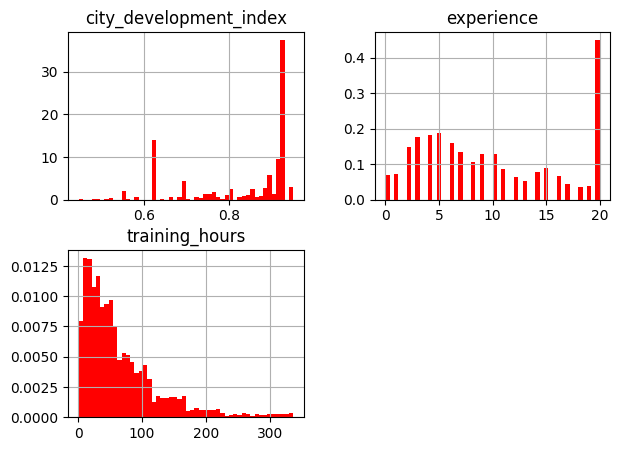

In [ ]:
import matplotlib.pyplot as plt
df_.hist(bins=50,density=True,figsize=(7,5),color='r')


plt.show()

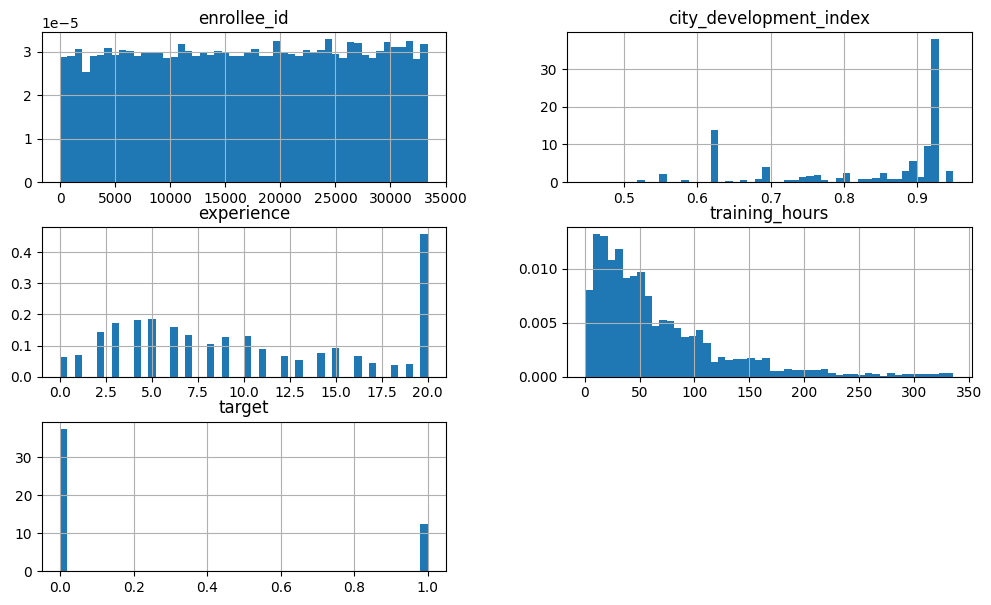

In [ ]:
new_df.hist(bins=50,density=True,figsize=(12,7))
plt.show()

<Axes: ylabel='Density'>

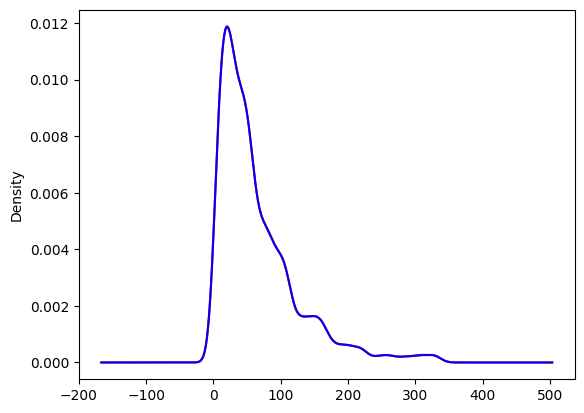

In [ ]:
df['training_hours'].plot.density(color='red')
new_df['training_hours'].plot.density(color='blue')

In [ ]:
def temp(attribute):
  data=pd.concat([
      df[attribute].value_counts()/len(df),#percentage of observation per category(before cca)
      new_df[attribute].value_counts()/len(new_df)#after cca
  ],axis=1)
  data.columns=['before','after']
  print(pd.DataFrame(data))


temp('city_development_index')
temp('enrolled_university')
temp('education_level')
temp('experience')
temp('training_hours')




                          before     after
city_development_index                    
0.920                   0.265059  0.277733
0.624                   0.136705  0.137760
0.910                   0.078401  0.081364
0.926                   0.067700  0.069200
0.698                   0.034659  0.033058
...                          ...       ...
0.649                   0.000209  0.000175
0.807                   0.000209  0.000233
0.781                   0.000157  0.000175
0.625                   0.000157  0.000116
0.664                   0.000052  0.000058

[93 rows x 2 columns]
                       before     after
enrolled_university                    
no_enrollment        0.721213  0.735188
Full time course     0.196106  0.200733
Part time course     0.062533  0.064079
                   before     after
education_level                    
Graduate         0.605387  0.619835
Masters          0.227633  0.234082
High School      0.105282  0.107380
Phd              0.021610  0.022116
Pr

In [ ]:
### handling missing numerical data
#univariate imputation---SimpleImputer
#multivariate imputation---KNN,Iterative
#filling ---mean/median,arbitary,End of distribution,randomly
#use median for skewd distribution
#appropriate when nan values are less
#may change the distribution shape,sensitive to outliers,covariance/correlation changes

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('/content/titanic_toy.csv')
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [ ]:
df.isnull().mean()*100

,0
Age,19.865320
Fare,5.050505
Family,0.000000
Survived,0.000000


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['Survived']),df['Survived'],test_size=0.2,random_state=42)

In [ ]:
x_train.isnull().mean()*100

,0
Age,19.662921
Fare,5.056180
Family,0.000000


In [ ]:
mean_age=x_train['Age'].mean()
median_age=x_train['Age'].median()

mean_fare=x_train['Fare'].mean()
median_fare=x_train['Fare'].median()

x_train['age_mean']=x_train['Age'].fillna(mean_age)
x_train['age_median']=x_train['Age'].fillna(median_age)

x_train['fare_mean']=x_train['Fare'].fillna(mean_fare)
x_train['fare_median']=x_train['Fare'].fillna(median_fare)

In [ ]:
x_train

,Age,Fare,Family,age_mean,age_median,fare_mean,fare_median
331,45.5,28.5000,0,45.500000,45.5,28.500000,28.5000
733,23.0,13.0000,0,23.000000,23.0,13.000000,13.0000
382,32.0,7.9250,0,32.000000,32.0,7.925000,7.9250
704,26.0,7.8542,1,26.000000,26.0,7.854200,7.8542
813,6.0,31.2750,6,6.000000,6.0,31.275000,31.2750
...,...,...,...,...,...,...,...
106,21.0,7.6500,0,21.000000,21.0,7.650000,7.6500
270,NaN,31.0000,0,29.498846,28.0,31.000000,31.0000
860,41.0,NaN,2,41.000000,41.0,32.517788,14.4000
435,14.0,120.0000,3,14.000000,14.0,120.000000,120.0000


In [ ]:
print('Original age variance',x_train['Age'].var())
print('age variance after mean imputation',x_train['age_mean'].var())
print('age variance after median imputation',x_train['age_median'].var())


print('Original fare variance',x_train['Fare'].var())
print('fare variance after mean imputation',x_train['fare_mean'].var())
print('fare variance after median imputation',x_train['fare_median'].var())


Original age variance 210.2517072477438
age variance after mean imputation 168.8519336687225
age variance after median imputation 169.20731007048096
Original fare variance 2761.031434948639
fare variance after mean imputation 2621.2323749512393
fare variance after median imputation 2637.01248167777


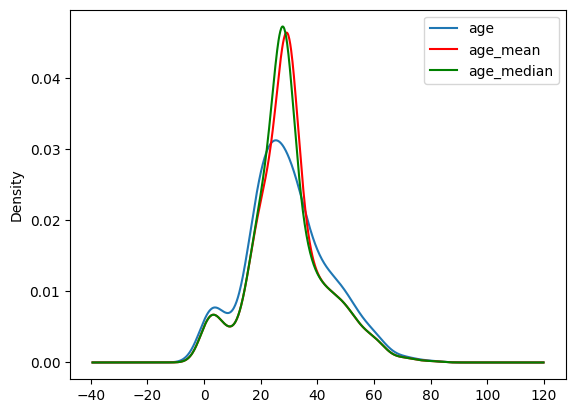

In [ ]:
x_train['Age'].plot(kind='kde',label='age')
x_train['age_mean'].plot(kind='kde',color='red',label='age_mean')
x_train['age_median'].plot(kind='kde',color='green',label='age_median')

plt.legend()
plt.show()

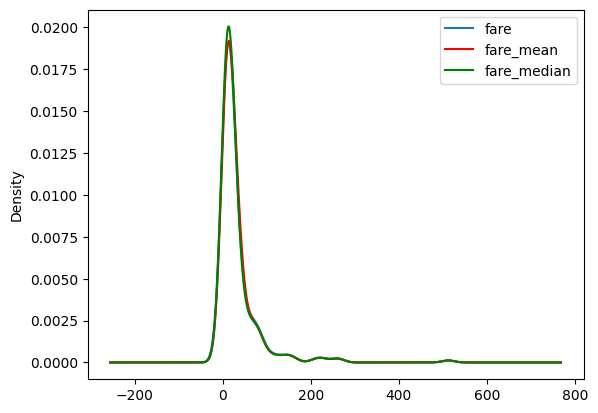

In [ ]:
x_train['Fare'].plot(kind='kde',label='fare')
x_train['fare_mean'].plot(kind='kde',color='red',label='fare_mean')
x_train['fare_median'].plot(kind='kde',color='green',label='fare_median')

plt.legend()
plt.show()

In [ ]:
x_train.cov()

,Age,Fare,Family,age_mean,age_median,fare_mean,fare_median
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,71.193767,70.082085
Fare,75.481375,2761.031435,18.599163,60.224654,63.938058,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.616299,-5.587710,17.657433,17.672035
age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,57.175304,56.282518
age_median,210.251707,63.938058,-5.587710,168.851934,169.207310,60.700688,59.728510
fare_mean,71.193767,2761.031435,17.657433,57.175304,60.700688,2621.232375,2621.232375
fare_median,70.082085,2761.031435,17.672035,56.282518,59.728510,2621.232375,2637.012482


In [ ]:
x_train.corr()

,Age,Fare,Family,age_mean,age_median,fare_mean,fare_median
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.088944,0.087232
Fare,0.091482,1.000000,0.207193,0.088151,0.093496,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.256883,-0.255307,0.204981,0.204536
age_mean,1.000000,0.088151,-0.256883,1.000000,0.998949,0.085941,0.084346
age_median,1.000000,0.093496,-0.255307,0.998949,1.000000,0.091145,0.089416
fare_mean,0.088944,1.000000,0.204981,0.085941,0.091145,1.000000,0.997003
fare_median,0.087232,1.000000,0.204536,0.084346,0.089416,0.997003,1.000000


<Axes: >

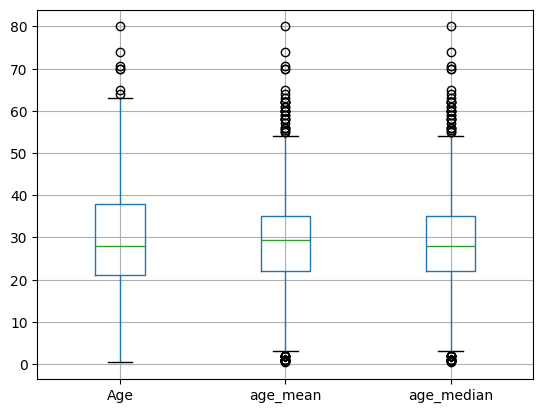

In [ ]:
x_train[['Age','age_mean','age_median']].boxplot()

<Axes: >

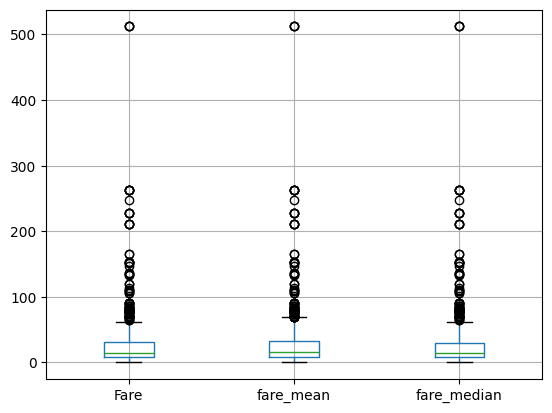

In [ ]:
x_train[['Fare','fare_mean','fare_median']].boxplot()

In [ ]:
#imputation using sklearn

mean_imputer=SimpleImputer(strategy='mean')
median_imputer=SimpleImputer(strategy='median')

trf=ColumnTransformer([
    ('mean_imputer',mean_imputer,['Age']),
    ('median_imputer',median_imputer,['Fare'])
],remainder='passthrough')

trf.fit(x_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('mean_imputer', SimpleImputer(), ['Age']),
                                ('median_imputer',
                                 SimpleImputer(strategy='median'), ['Fare'])])

In [ ]:
trf.named_transformers_['mean_imputer'].statistics_

array([29.49884615])

In [ ]:
trf.named_transformers_['median_imputer'].statistics_

array([14.4])

In [ ]:
x_train_trf=trf.transform(x_train)
#x_test_trf=trf.transform(x_test)
x_train_trf

array([[ 45.5       ,  28.5       ,   0.        , ...,  45.5       ,
         28.5       ,  28.5       ],
       [ 23.        ,  13.        ,   0.        , ...,  23.        ,
         13.        ,  13.        ],
       [ 32.        ,   7.925     ,   0.        , ...,  32.        ,
          7.925     ,   7.925     ],
       ...,
       [ 41.        ,  14.4       ,   2.        , ...,  41.        ,
         32.51778772,  14.4       ],
       [ 14.        , 120.        ,   3.        , ...,  14.        ,
        120.        , 120.        ],
       [ 21.        ,  77.2875    ,   1.        , ...,  21.        ,
         77.2875    ,  77.2875    ]])

In [ ]:
## arbitary value imputer
#categorical --replace with word 'missing'


In [ ]:
##### handling categorical missing data
#replace by mode(most frequent)

In [ ]:
df=pd.read_csv('/content/train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
df

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [ ]:
df.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


<Axes: xlabel='GarageQual'>

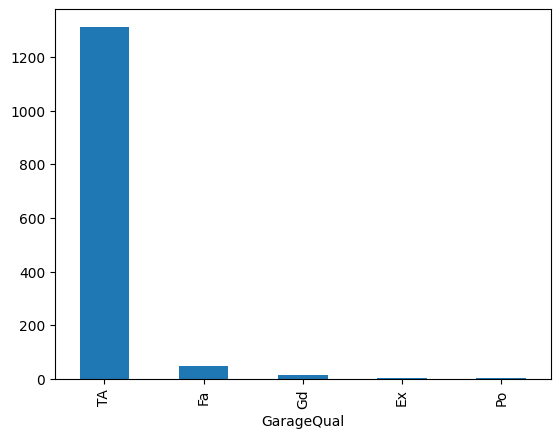

In [ ]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()

In [ ]:
df['GarageQual'].mode()

,GarageQual
0,TA


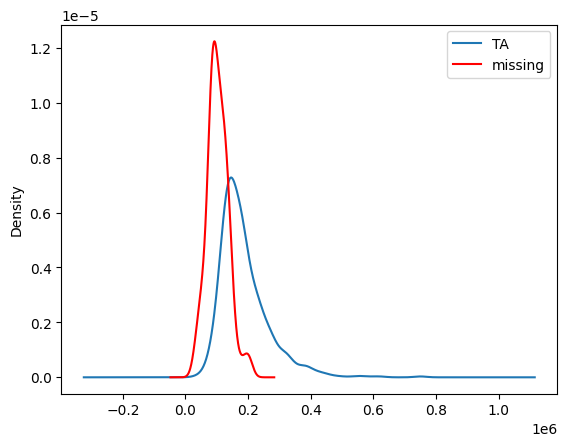

In [ ]:
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',label='TA')
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',color='red',label='missing')
plt.legend()
plt.show()

<ipython-input-118-43455c7c3d67>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna('TA',inplace=True)


<Axes: xlabel='GarageQual'>

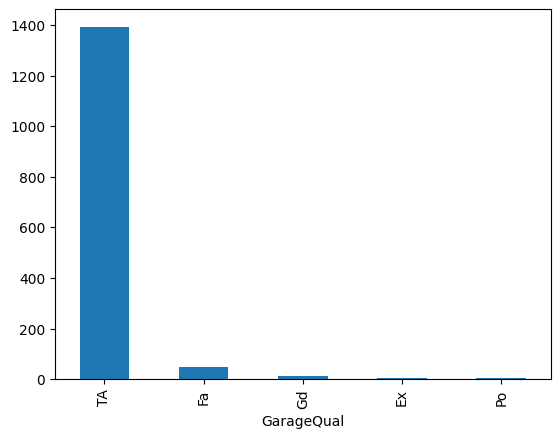

In [ ]:
# filling missing values with mode
temp=df[df['GarageQual']=='TA']['SalePrice']
df['GarageQual'].fillna('TA',inplace=True)
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()

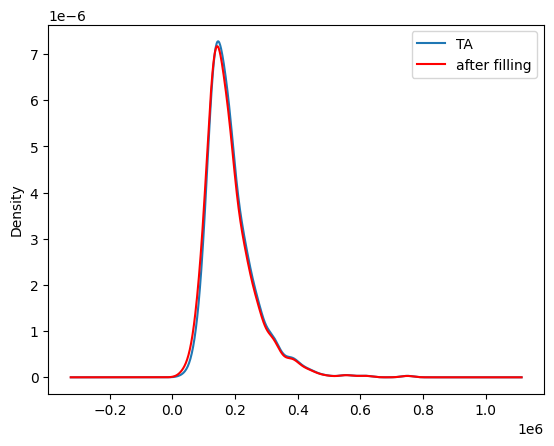

In [ ]:
temp.plot(kind='kde',label='TA')
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',color='red',label='after filling')
plt.legend()
plt.show()

In [ ]:
##random imputation -randomly select from all other non missing values
#conserve variance

In [ ]:
## KNN Imputer for multivariate
#dist(x,y)=sqrt(weight*sq.distance from present coordinates)
#weight=(total # of coordinates)/(present #of coordinates)

In [ ]:
df=pd.read_csv('/content/titanic.csv',usecols=['Age','Pclass','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [ ]:
df.isnull().mean()*100

,0
Survived,0.00000
Pclass,0.00000
Age,19.86532
Fare,0.00000


In [ ]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.head()

,Pclass,Age,Fare
331,1,45.5,28.5000
733,2,23.0,13.0000
382,3,32.0,7.9250
704,3,26.0,7.8542
813,3,6.0,31.2750


In [ ]:
from sklearn.impute import KNNImputer,SimpleImputer

knn=KNNImputer()# weight=uniform and distance
#uniform (distance1+distance2)/2
x_train_trf=knn.fit_transform(x_train)
x_test_trf=knn.transform(x_test)
pd.DataFrame(x_train_trf,columns=x_train.columns)

,Pclass,Age,Fare
0,1.0,45.5,28.5000
1,2.0,23.0,13.0000
2,3.0,32.0,7.9250
3,3.0,26.0,7.8542
4,3.0,6.0,31.2750
...,...,...,...
707,3.0,21.0,7.6500
708,1.0,39.0,31.0000
709,3.0,41.0,14.1083
710,1.0,14.0,120.0000


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr=LogisticRegression()
lr.fit(x_train_trf,y_train)
y_pred=lr.predict(x_test_trf)
accuracy_score(y_test,y_pred)

0.7430167597765364

In [ ]:
si=SimpleImputer()
x_train_trf2=si.fit_transform(x_train)
x_test_trf2=si.transform(x_test)
lr.fit(x_train_trf2,y_train)
y_pred2=lr.predict(x_test_trf2)
accuracy_score(y_test,y_pred2)

0.7374301675977654

In [ ]:
## KNN works better than mean/median

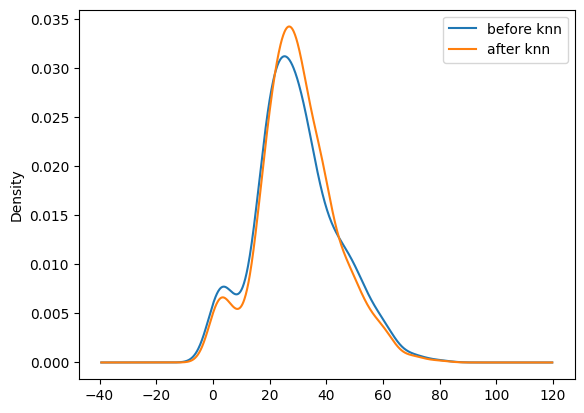

In [ ]:
x_train['Age'].plot(kind='kde',label='before knn')
pd.DataFrame(x_train_trf,columns=x_train.columns)['Age'].plot(kind='kde',label='after knn')
plt.legend()
plt.show()


In [ ]:
#MICE--Multivariate Imputation by chained Equations,Iterative Imputator

In [ ]:
################## OUTLIERS#############################

In [ ]:
## z score outlier detection and removal :assumption the dataset is normally distributed
#outlier removal--trimming and capping
#trim the rows with outliers
#cap the values of outliers with min or max according to requirement

In [ ]:
df=pd.read_csv('/content/placement.csv')
df.sample(5)

,cgpa,placement_exam_marks,placed
580,7.90,63.0,1
835,6.67,65.0,1
503,6.97,10.0,1
479,6.38,33.0,0
376,6.25,60.0,0


<ipython-input-139-c93c747a6f8f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
<ipython-input-139-c93c747a6f8f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


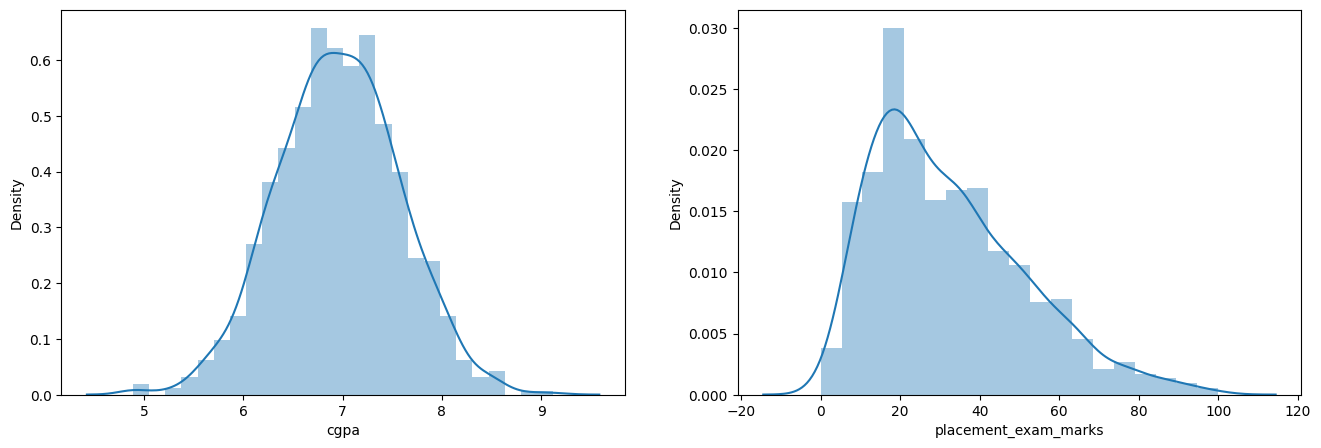

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])
plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
plt.show()

In [ ]:
print('Mean value of cgap',df['cgpa'].mean())
print('std of cgpa',df['cgpa'].std())
print('min value of cgpa',df['cgpa'].min())
print('max value of cgpa',df['cgpa'].max())
# we can apply z score method only to cgpa because it is normally distributed


Mean value of cgap 6.96124
std of cgpa 0.6158978751323894
min value of cgpa 4.89
max value of cgpa 9.12


In [ ]:
print('highest value:',df['cgpa'].mean()+3*df['cgpa'].std())
print('lowest value:',df['cgpa'].mean()-3*df['cgpa'].std())

highest value: 8.808933625397168
lowest value: 5.113546374602832


In [ ]:
temp=df[(df['cgpa']>8.80 )| (df['cgpa']<5.11)]


In [ ]:
##trimming
new_df=df[(df['cgpa']<8.80 )& (df['cgpa']>5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [ ]:
## approach 2
df['cgpa_z_score']=(df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()
df.head()

,cgpa,placement_exam_marks,placed,cgpa_z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [ ]:
df[(df['cgpa_z_score']>3) | (df['cgpa_z_score']<-3)]

,cgpa,placement_exam_marks,placed,cgpa_z_score
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [ ]:
new_df=df[(df['cgpa_z_score']<3) & (df['cgpa_z_score']>-3)]
new_df

,cgpa,placement_exam_marks,placed,cgpa_z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


In [ ]:
############ capping

upper_limit=df['cgpa'].mean()+3*df['cgpa'].std()
lower_limit=df['cgpa'].mean()-3*df['cgpa'].std()

df['cgpa']=np.where(df['cgpa']>upper_limit,upper_limit,
                    np.where(df['cgpa']<lower_limit,lower_limit,df['cgpa']))




In [ ]:
df['cgpa'].describe()

,cgpa
count,1000.000000
mean,6.961499
std,0.612688
min,5.113546
25%,6.550000
50%,6.960000
75%,7.370000
max,8.808934


In [ ]:
#outlier removal and detection using IQR and boxplot: used for skewed
#IQR=interquartile range=Q3-Q1(75th percentile-25th percentile)
#in box plot maximum =Q3+1.5IQR, minimum=Q1-1.5*IQR...these are  called whiskers, IQR proximity rule
# points outside this max and min are outliers
#removal using trimming and cappping

In [ ]:
df
# we will work on placement_exam_marks because it is skewed


,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<Axes: ylabel='placement_exam_marks'>

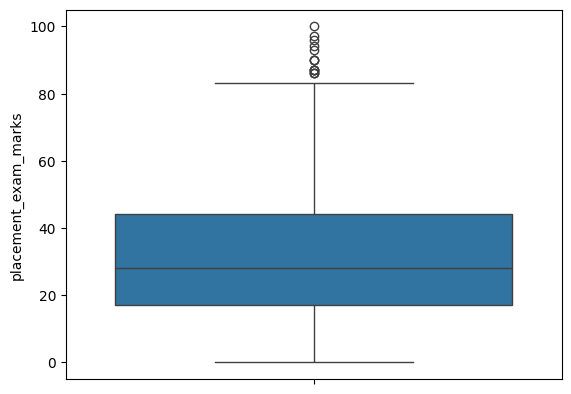

In [ ]:
sns.boxplot(df['placement_exam_marks'])

In [ ]:
df['placement_exam_marks'].describe()

,placement_exam_marks
count,1000.000000
mean,32.225000
std,19.130822
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,100.000000


In [ ]:
Q1=df['placement_exam_marks'].quantile(0.25)
Q3=df['placement_exam_marks'].quantile(0.75)
iqr=Q3-Q1
upper_limit=Q3+1.5*iqr
lower_limit=Q1-1.5*iqr

In [ ]:
df[df['placement_exam_marks']>upper_limit]['placement_exam_marks']

,placement_exam_marks
9,94.0
40,86.0
61,86.0
134,93.0
162,90.0
283,87.0
290,87.0
311,87.0
324,90.0
630,96.0


In [ ]:
# remove using trimming and capping like the previous one